University of Helsinki, Master's Programme in Data Science  
DATA20046 Neural Networks and Deep Learning - Spring 2025  
Arto Klami, Aapo Hyvärinen  

# Problem Set 1: Introduction

## 1. Basic definitions

1. (8 pts) One proposal as activation function is the **"leaky ReLU"**: $$\psi(x) = \begin{cases} x, & \text{if } x \geq 0 \\  \alpha x, & \text{if } x < 0 \end{cases}$$ For some constant $0 \leq \alpha \leq 1$, typically small.

  - (a) Show that the basic ReLU is a special case of this.
  - (b) Show that the linear activation function is also a special case.
  - (c) Show that the leaky ReLU can also be expressed as: $$\psi(x) = \max(\alpha x, x)$$

---

- (a) If we set $\alpha = 0$ we obtain the basic ReLU function $$ReLU(x) = \begin{cases} x, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$$
- (b) If we set $\alpha = 1$ we obtain the linear function $$f(x) = \begin{cases} x, & \text{if } x \geq 0 \\ x, & \text{if } x < 0 \end{cases}$$
- (c) If we consider $x \geq 0$ we obtain $\max(\alpha x, x) = x$ since $0 \leq \alpha \leq 1$ can only decrease the value of $\alpha x$ compared to $x$, on the other hand if we consider $x \lt 0$ we obtain $\max(\alpha x, x) = \alpha x$ for the same reasoning.

---

2. (8 pts) Take a multi-layer neural network with linear activation function: $$y_K = W_K W_{K-1} \ldots W_2 W_1 x = M x =: g(x)$$ where the total function given by the NN is denoted by $g$.

	- (a) Suppose we know that $W_1$ is of size $m \times n$. What kind of constraint does this imply on the size of $W_2$?
	- (b) Suppose again that we know that W1 is of size $m \times n$. What is a necessary condition on $m,n$ to make it possible that the neural
network is injective (also called invertible in NN literature), meaning that for any output y you can compute the original x. (A non-rigorous answer is fine.)
	- (c) Assume that all matrices $W_i$ are square (same number of rows and columns). In the case of an arbitrary number of layers, give a necessary and sufficient condition on the $W_i$ such that this $g$ is injective.

---

- (a) Since $W_1 \in \mathbb{R}^{m \times n}$ then $W_1 x = y$ where $y \in \mathbb{R}^{n}$. So in order for the multiplication $W_2 y = z$ to work we need that $W_2 \in \mathbb{R}^{n \times q}$.
- (b) In order for the neural network to be invertible we need that the matrix should be invertible. So that we can have $x = W_1^{-1} y$. For a matrix to be invertible it should be square so $W_1 \in \mathbb{R}^{m \times m}$.
- (c) Once all matrices $W_i$ are square the other constraint for matrix inversion is it's deteriminant should be positive so $|W_i| \gt 0$.

## 1. (9 pts) Construct a neural network using PyTorch.

As architecture, take a fully connected neural network with three layers of weights, and five neurons in each layer. (Thus, the input and the output are also 5-dimensional.) Try out the tanh, ReLU, and linear activation functions, always the same activation everywhere in the NN.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### (a)

In [ ]:
neural_network_relu = nn.Sequential(
	nn.Linear(5, 5, bias=False),
	nn.ReLU(),
	nn.Linear(5, 5, bias=False),
	nn.ReLU(),
	nn.Linear(5, 5, bias=False),
)

neural_network_tanh =  nn.Sequential(
	nn.Linear(5, 5, bias=False),
	nn.Tanh(),
	nn.Linear(5, 5, bias=False),
	nn.Tanh(),
	nn.Linear(5, 5, bias=False),
)


neural_network_linear =  nn.Sequential(
	nn.Linear(5, 5, bias=False),
	nn.Linear(5, 5, bias=False),
	nn.Linear(5, 5, bias=False),
)

In [81]:
torch.manual_seed(0)

weight_sets = [
	[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
]

x = torch.linspace(-10, 10, 400)
x_rest = torch.rand(4)

y_relu_results = [torch.zeros_like(x), torch.zeros_like(x), torch.zeros_like(x)]
y_tanh_results = [torch.zeros_like(x), torch.zeros_like(x), torch.zeros_like(x)]
y_linear_results = [torch.zeros_like(x), torch.zeros_like(x), torch.zeros_like(x)]

with torch.no_grad():
	neural_network_relu =  nn.Sequential(
		nn.Linear(5, 5, bias=False),
		nn.ReLU(),
		nn.Linear(5, 5, bias=False),
		nn.ReLU(),
		nn.Linear(5, 5, bias=False),
	)
	neural_network_tanh =  nn.Sequential(
		nn.Linear(5, 5, bias=False),
		nn.Tanh(),
		nn.Linear(5, 5, bias=False),
		nn.Tanh(),
		nn.Linear(5, 5, bias=False),
	)
	neural_network_linear =  nn.Sequential(
		nn.Linear(5, 5, bias=False),
		nn.Linear(5, 5, bias=False),
		nn.Linear(5, 5, bias=False),
	)
	for weight_idx, weight_set in enumerate(weight_sets):
		for net in [neural_network_relu, neural_network_tanh]:
			net[0].weight.copy_(weight_set[0])  # First Linear Layer
			net[2].weight.copy_(weight_set[1])  # Second Linear Layer
			net[4].weight.copy_(weight_set[2])  # Third Linear Layer

		neural_network_linear[0].weight.copy_(weight_set[0])  # First Linear Layer
		neural_network_linear[1].weight.copy_(weight_set[1])  # Second Linear Layer
		neural_network_linear[2].weight.copy_(weight_set[2])  # Third Linear Layer
	

		for idx, x_i in enumerate(x):
			input = torch.cat((x_i.reshape(1), x_rest), -1) 
			# print(input)
			y_relu_results[weight_idx][idx] = neural_network_relu(input)[0]
			y_tanh_results[weight_idx][idx] = neural_network_tanh(input)[0]
			y_linear_results[weight_idx][idx] = neural_network_linear(input)[0]

	# print(w1)
	# print(neural_network_relu[0].weight)
	
	# print(w2)
	# print(neural_network_relu[2].weight)

	# print(w3)
	# print(neural_network_relu[4].weight)



#### (b)

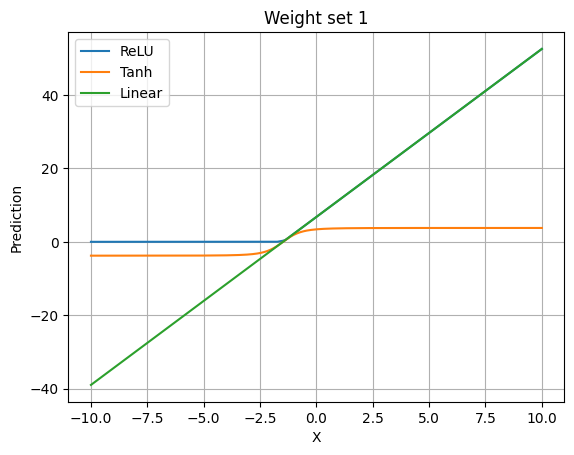

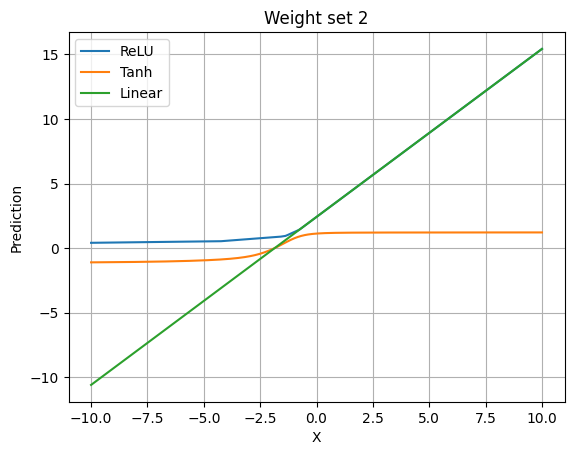

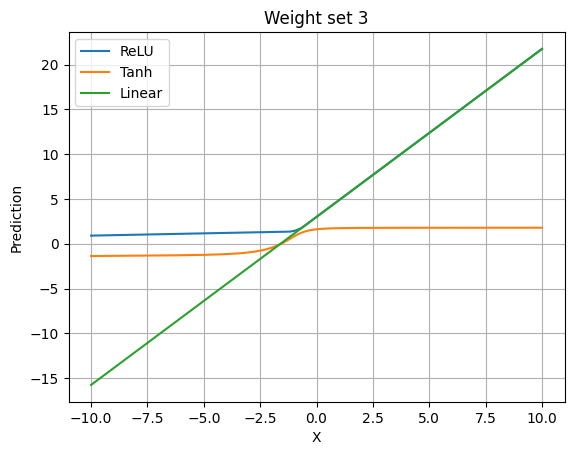

In [82]:
plt.plot(x, y_relu_results[0], label='ReLU')
plt.plot(x, y_tanh_results[0], label='Tanh')
plt.plot(x, y_linear_results[0], label='Linear')

# Add a legend
plt.legend()

# Add labels for x and y axes
plt.title("Weight set 1")
plt.xlabel('X')
plt.ylabel('Prediction')
plt.grid()
# Show the plot
plt.show()

plt.plot(x, y_relu_results[1], label='ReLU')
plt.plot(x, y_tanh_results[1], label='Tanh')
plt.plot(x, y_linear_results[1], label='Linear')

# Add a legend
plt.legend()

# Add labels for x and y axes
plt.title("Weight set 2")

plt.xlabel('X')
plt.ylabel('Prediction')
plt.grid()
# Show the plot
plt.show()

plt.plot(x, y_relu_results[2], label='ReLU')
plt.plot(x, y_tanh_results[2], label='Tanh')
plt.plot(x, y_linear_results[2], label='Linear')

# Add a legend
plt.legend()

# Add labels for x and y axes
plt.title("Weight set 3")

plt.xlabel('X')
plt.ylabel('Prediction')
plt.grid()
# Show the plot
plt.show()

TypeError: float() argument must be a string or a real number, not 'ellipsis'

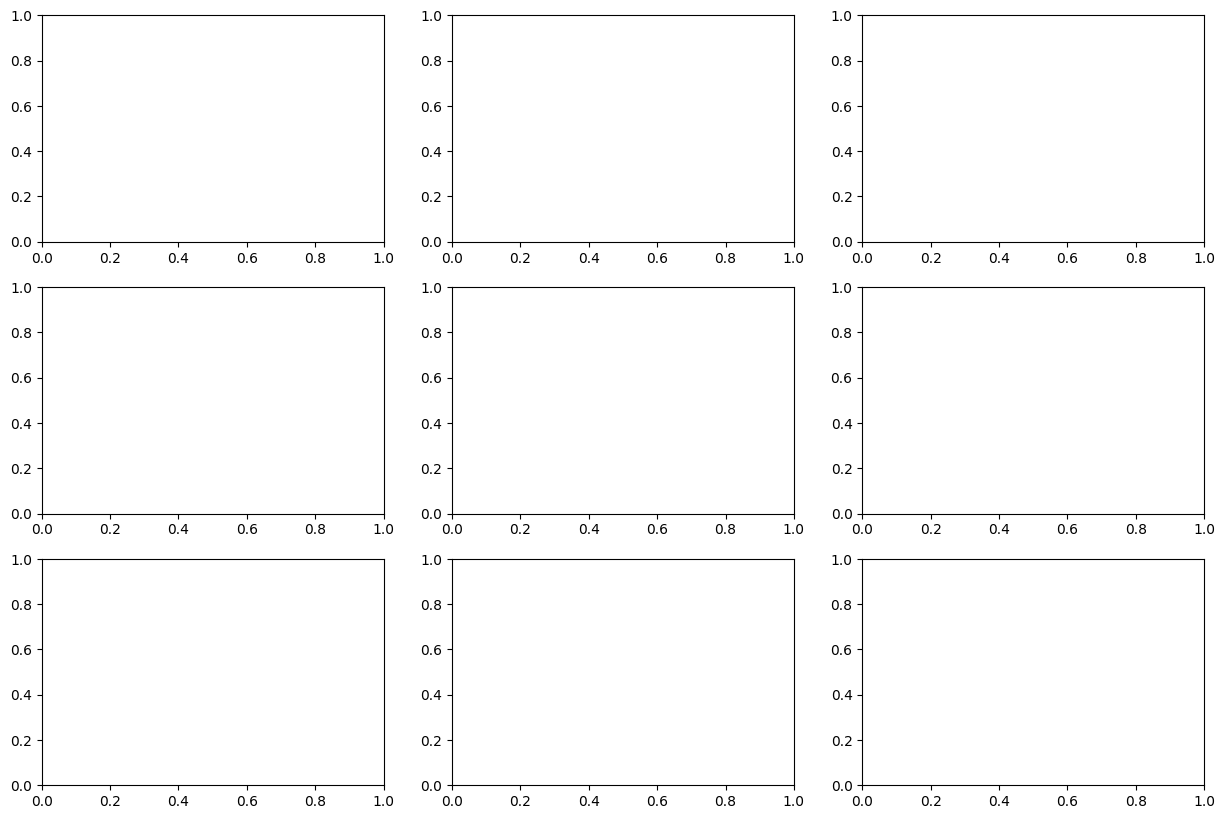

In [83]:
...

# Code for reporting the 9 plots:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3): # loop over rows of plot
    ...
    for j in range(3): # loop over cols of plot
        ...
        axs[i, j].plot(...)
        axs[i, j].set_title(...)
        axs[i, j].set_xlabel('x1')
        axs[i, j].set_ylabel('y1')
plt.tight_layout()
plt.show()

## 2 Optimization

### 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a)

In [ ]:
def f(x):
    w1 = x[0]
    w2 = x[1]
    return np.exp(-w2**2 - 2 * (w2 -1)**2) + np.exp(-(w1-1)**2 - 2*w2**2)

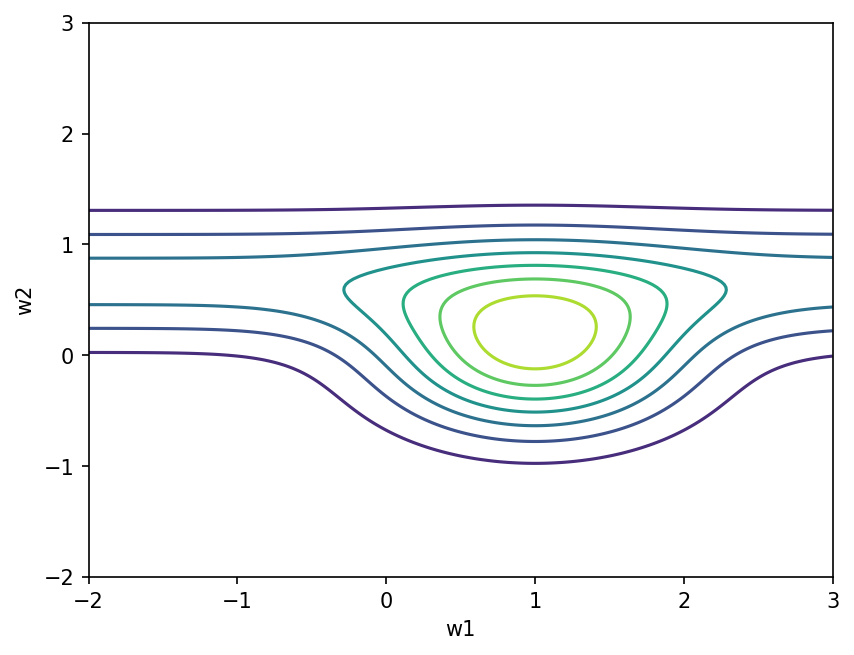

In [ ]:

# Code for plotting isocontours of the function f
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150)
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### (b)

**your solution here**

In [ ]:
def f_prime(x):
    w1 = x[0]
    w2 = x[1]
    return np.array([-2 * (w1-1) * np.exp( -(w1-1) ** 2 - 2 * w2**2 ), (-2*w2-4*(w2-1))*np.exp(-w2**2 - 2 * (w2 -1)**2)-4*w2*np.exp(-w2**2 - (w2 -1)**2)])

#### (c)

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

step_size = 0.01
iterations = 0
treshold = 0.00001
weight_1_trajectory = [w1]
while True:
	w1_step = w1 + step_size * f_prime(w1)
	weight_1_trajectory.append(w1_step)
	if np.all(w1_step - w1 < treshold): break
	else: 
		w1 = w1_step
		iterations += 1
	

print(f"iterations for w1: {iterations}")
iterations = 0
weight_2_trajectory = [w2]

while True:
	w2_step = w2 + step_size * f_prime(w2)
	weight_2_trajectory.append(w2_step)
	if np.all(w2_step - w2 < treshold): break
	else: 
		w2 = w2_step
		iterations += 1
print(f"iterations for w2: {iterations}")
iterations = 0
weight_3_trajectory = [w3]

while True:
	w3_step = w3 + step_size * f_prime(w3)
	weight_3_trajectory.append(w3_step)

	if np.all(w3_step - w3 < treshold): break
	else: 
		w3 = w3_step
		iterations += 1
print(f"iterations for w3: {iterations}")

print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")

iterations for w1: 469
iterations for w2: 414
iterations for w3: 0
w1: [0.99938246 0.32496789]
w2: [0.99938618 0.3249678 ]
w3: [1. 1.]


#### (d)

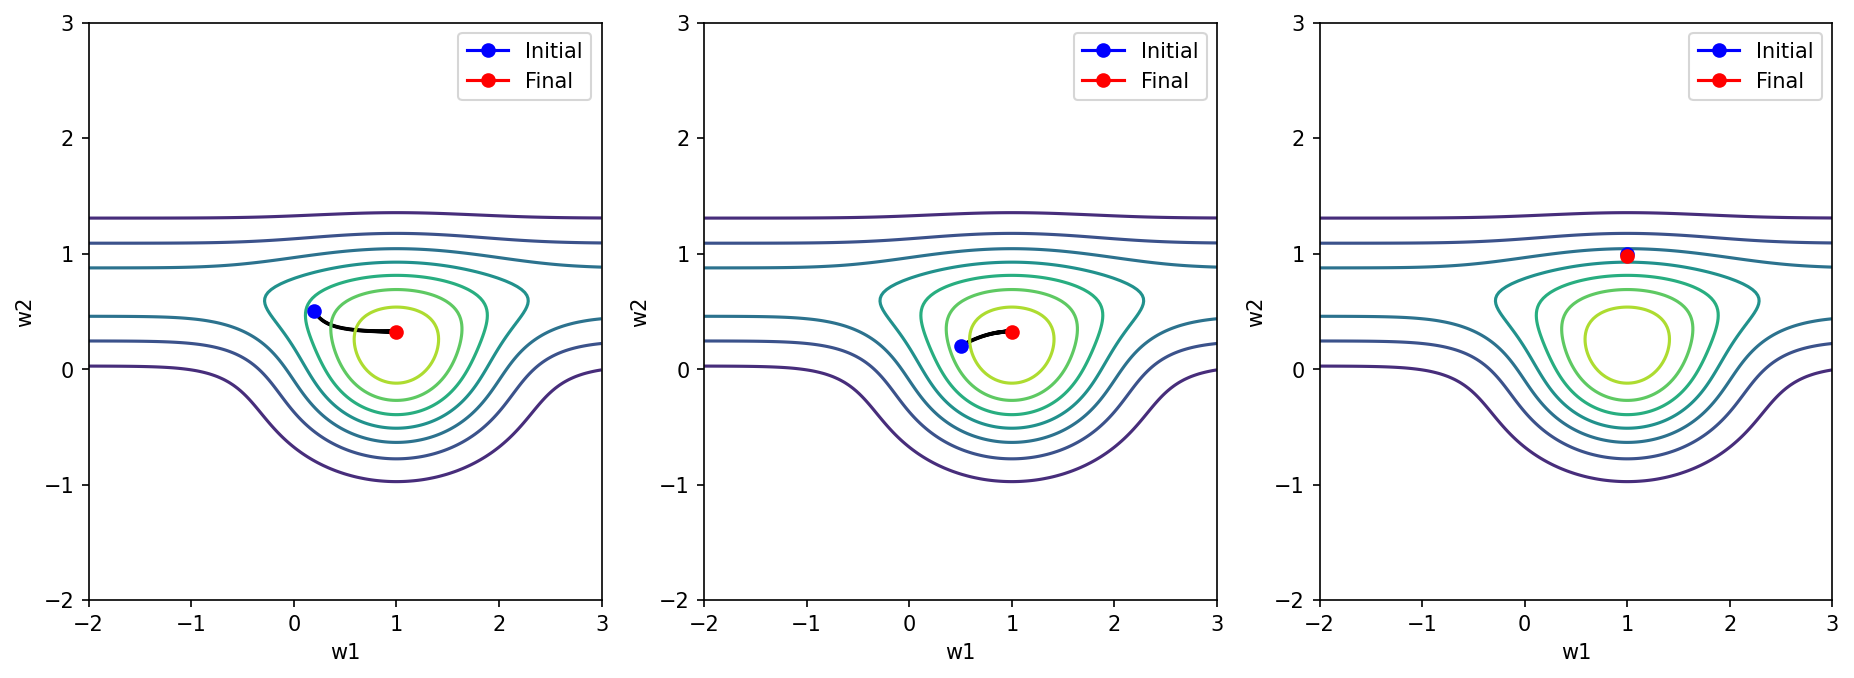

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

trajectories = [weight_1_trajectory, weight_2_trajectory, weight_3_trajectory]
# Code for plotting.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
for i, weight in enumerate([w1, w2, w3]):
    ax = axes[i]
    ax.contour(W1, W2, Fs)
    ax.plot(weight[0], weight[1], marker="o", color="blue", label="Initial")
    trajectory = trajectories[i]
    for j in range(1, len(trajectory)):
        x, y = trajectory[j]
        dx, dy = trajectory[j] - trajectory[j-1]
        ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.003)
    ax.plot(trajectory[-1][0], trajectory[-1][1], marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
plt.show()

#### (e)

In [ ]:
# Code for plotting.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, w in enumerate(weight_1_trajectory):
    axs[i].plot()
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
plt.show()

#### (f)

**your solution here**